In [1]:
import numpy as np 
import xarray as xr
import pandas as pd 
import matplotlib.pyplot as plt

import glob

In [58]:
file = glob.glob('/mnt/users/scratch/uvoggenberger/testfiles/*.nc')[0]
ds = xr.open_dataset(file)
df = ds.to_dataframe().reset_index()

In [59]:
df.keys()

Index(['index', 'observation_id', 'report_id', 'data_policy_licence',
       'z_coordinate', 'z_coordinate_type', 'observed_variable',
       'observation_value', 'units', 'quality_flag', 'sensor_id',
       'processing_level', 'source_id', 'report_type', 'station_name',
       'station_type', 'platform_type', 'primary_station_id',
       'height_of_station_above_sea_level', 'report_timestamp',
       'report_duration', 'profile_id', 'record_timestamp', 'secondary_id',
       'city', 'an_depar@body', 'fg_depar@body', 'fg_depar@offline',
       'uncertainty_type1', 'uncertainty_units1', 'uncertainty_value1',
       'longitude', 'latitude', 'longitude|header_table',
       'latitude|header_table', 'homogenisation_adjustment',
       'humidity_bias_estimate', 'wind_bias_estimate',
       'homogenisation_method'],
      dtype='object')

In [60]:
df[['z_coordinate', 'observed_variable',
       'observation_value', 'report_timestamp','longitude|header_table',
       'latitude|header_table', 'homogenisation_adjustment',
       'humidity_bias_estimate', 'wind_bias_estimate',
       'homogenisation_method' ]]

,z_coordinate,observed_variable,observation_value,report_timestamp,longitude|header_table,latitude|header_table,homogenisation_adjustment,humidity_bias_estimate,wind_bias_estimate,homogenisation_method
0,59530.00000,b'wind_from_direction',125.000000,1980-01-01 04:30:00,-171.779999,-13.8,0.000000e+00,0.000000e+00,0.0,0
1,70000.00000,b'wind_from_direction',135.000000,1980-01-01 04:30:00,-171.779999,-13.8,0.000000e+00,0.000000e+00,0.0,0
2,78190.00000,b'wind_from_direction',105.000000,1980-01-01 04:30:00,-171.779999,-13.8,0.000000e+00,0.000000e+00,0.0,0
3,84310.00000,b'wind_from_direction',120.000000,1980-01-01 04:30:00,-171.779999,-13.8,0.000000e+00,0.000000e+00,0.0,0
4,85000.00000,b'wind_from_direction',120.000000,1980-01-01 04:30:00,-171.779999,-13.8,0.000000e+00,0.000000e+00,0.0,0
...,...,...,...,...,...,...,...,...,...,...
843062,92500.00000,b'specific_humidity',0.000472,1980-01-01 23:30:00,158.399994,77.5,-2.902168e-12,-2.902168e-12,NaN,14
843063,100000.00000,b'specific_humidity',0.000392,1980-01-01 23:30:00,158.399994,77.5,8.985770e-12,8.985770e-12,NaN,14
843064,101700.00000,b'specific_humidity',0.000335,1980-01-01 23:30:00,158.399994,77.5,1.294842e-11,1.294842e-11,NaN,14
843065,104252.71875,b'specific_humidity',0.000122,1980-01-01 23:30:00,158.399994,77.5,7.634032e-12,7.634032e-12,NaN,14


In [61]:
df['observed_variable'].unique()

array([b'wind_from_direction', b'wind_speed', b'geopotential_height',
       b'eastward_wind_speed', b'air_temperature', b'air_dewpoint',
       b'relative_humidity', b'dew_point_depression',
       b'specific_humidity'], dtype=object)

122351 entries for b'wind_from_direction'


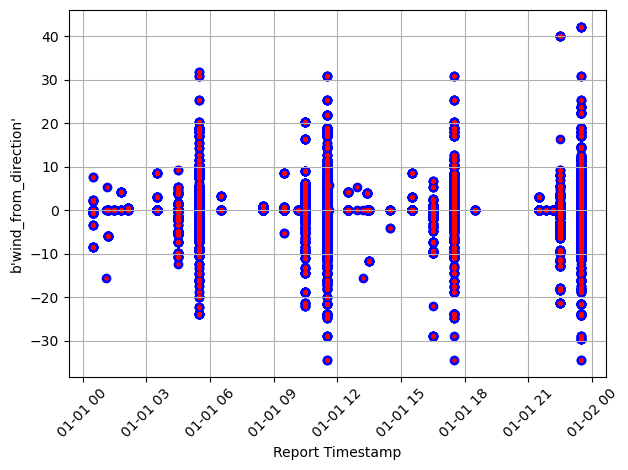

122339 entries for b'wind_speed'


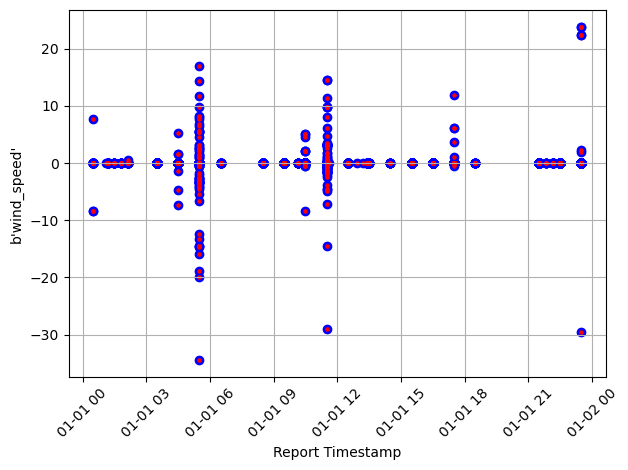

122239 entries for b'geopotential_height'


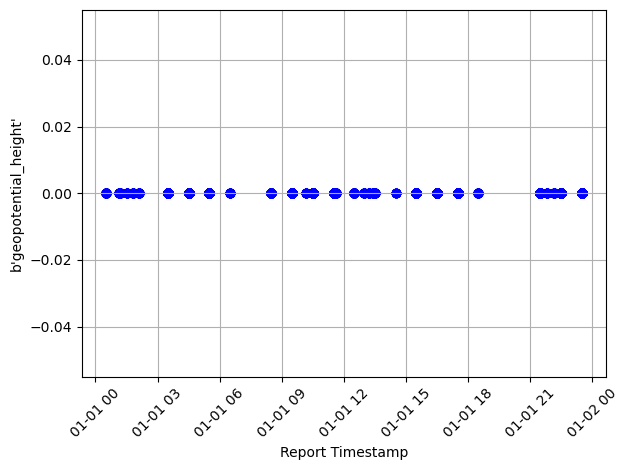

122344 entries for b'eastward_wind_speed'


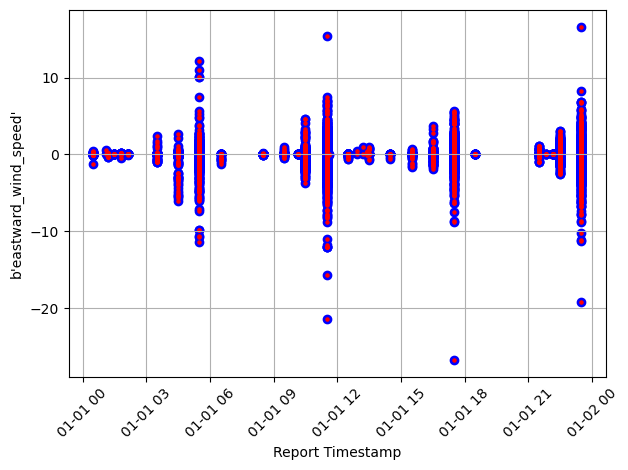

104586 entries for b'air_temperature'


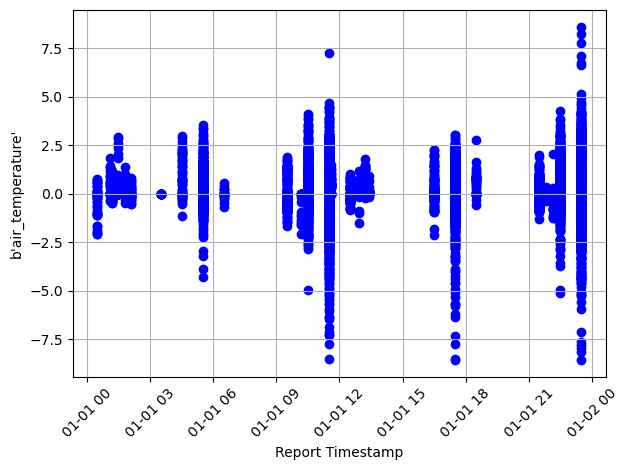

62706 entries for b'air_dewpoint'


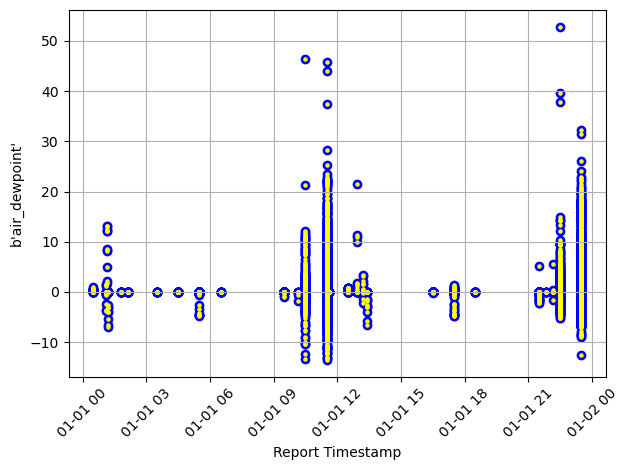

62198 entries for b'relative_humidity'


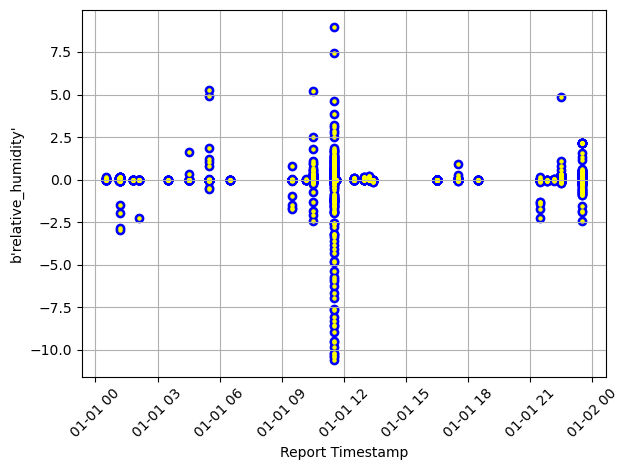

62413 entries for b'dew_point_depression'


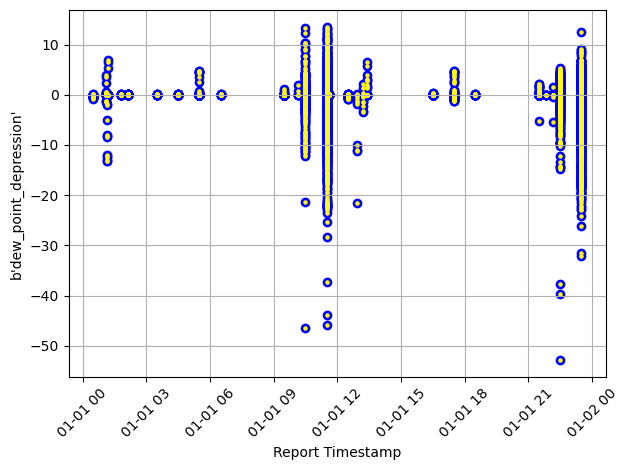

61891 entries for b'specific_humidity'


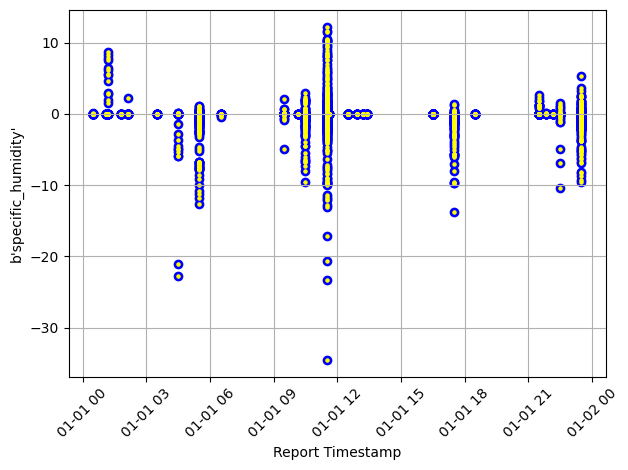

In [62]:
for i in df['observed_variable'].unique():
    df_sel = df[df['observed_variable'] == i]
    print(f"{len(df_sel)} entries for {i}")
    plt.scatter(df_sel['report_timestamp'], df_sel['homogenisation_adjustment'], color='blue', label='Bias Estimate')
    if "wind" in i.decode():
        plt.scatter(df_sel['report_timestamp'], df_sel['wind_bias_estimate'], color='red', label='Wind Bias Estimate', s=5)
    if "humidity" in i.decode() or "point" in i.decode():
        plt.scatter(df_sel['report_timestamp'], df_sel['humidity_bias_estimate'], color='yellow', label='Humidity Bias Estimate', s=5)
    plt.xlabel('Report Timestamp')
    plt.ylabel(i)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid()
    plt.show()
    plt.close()

## Random selection downloaded file:

122351 entries for b'wind_from_direction'


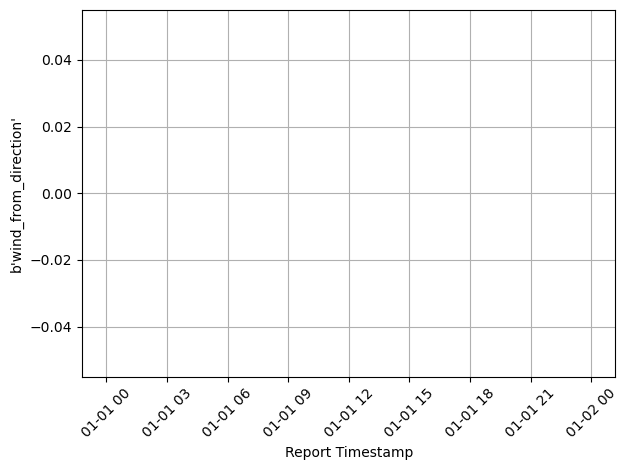

122339 entries for b'wind_speed'


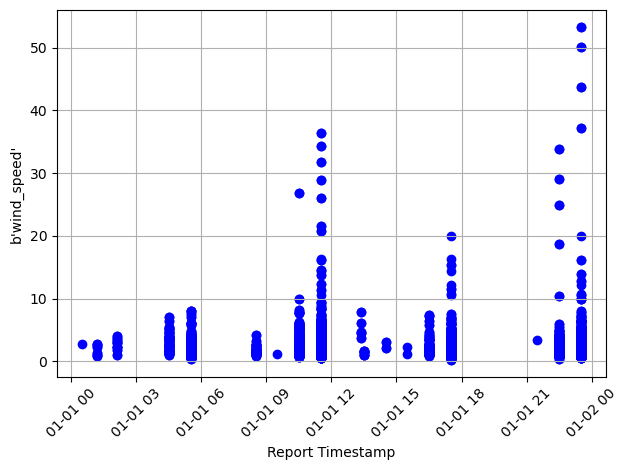

122239 entries for b'geopotential_height'


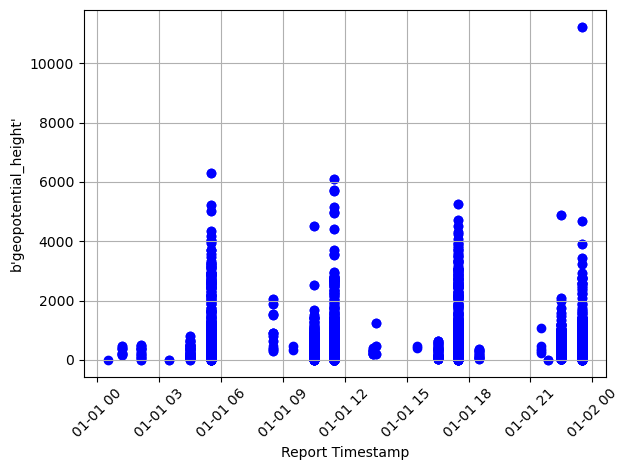

122344 entries for b'eastward_wind_speed'


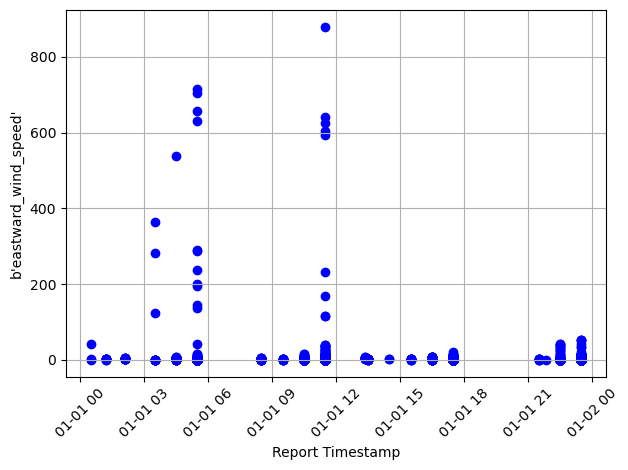

104586 entries for b'air_temperature'


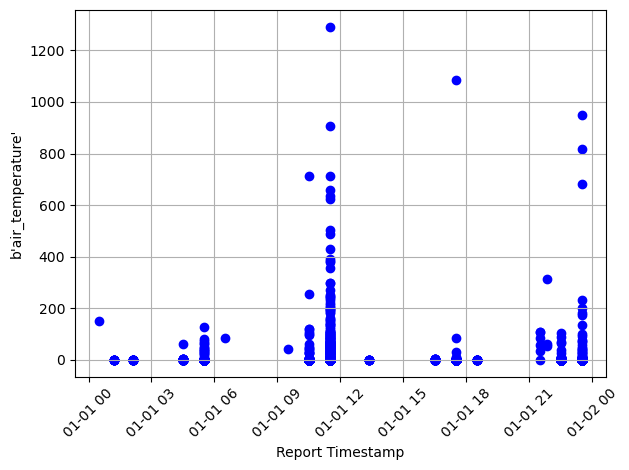

62706 entries for b'air_dewpoint'


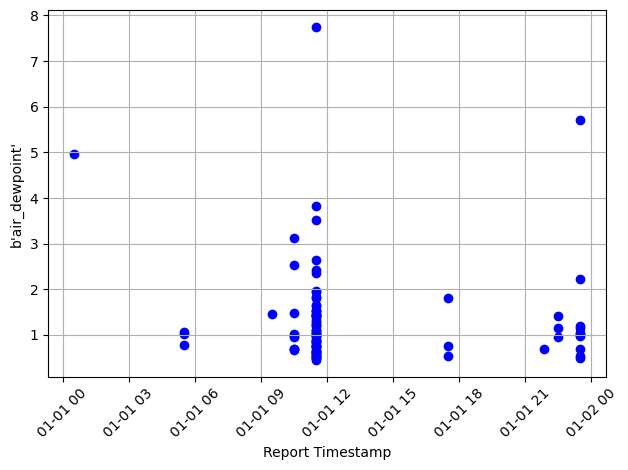

62198 entries for b'relative_humidity'


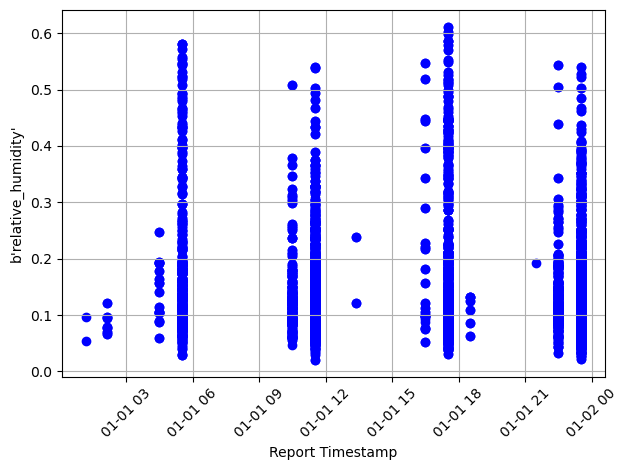

62413 entries for b'dew_point_depression'


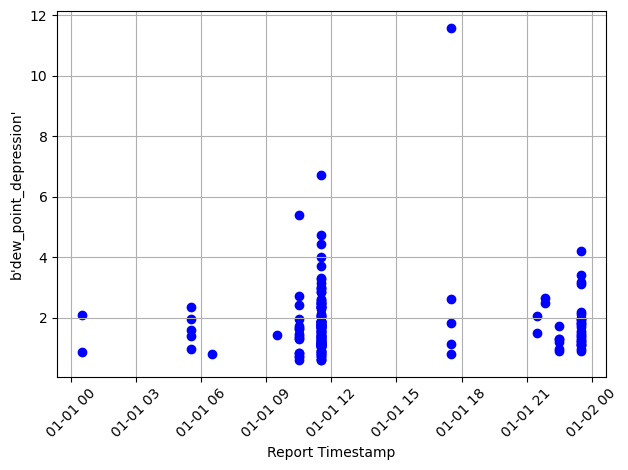

61891 entries for b'specific_humidity'


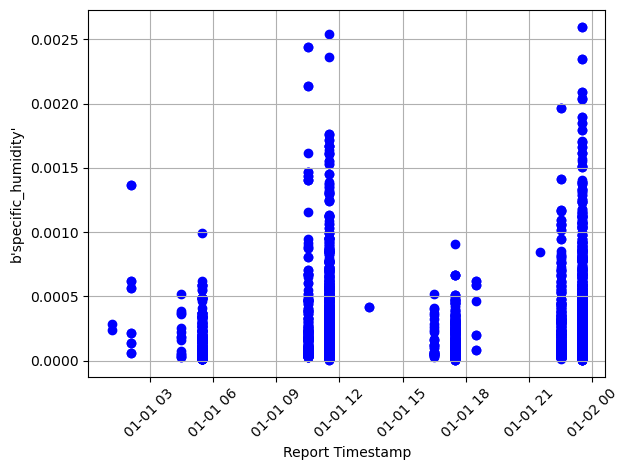

In [63]:
for i in df['observed_variable'].unique():
    df_sel = df[df['observed_variable'] == i]
    print(f"{len(df_sel)} entries for {i}")
    plt.scatter(df_sel['report_timestamp'], df_sel['uncertainty_value1'], color='blue', label='Uncertainty Value 1')
    plt.xlabel('Report Timestamp')
    plt.ylabel(i)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid()
    plt.show()
    plt.close()

## Testfile 1975.01. sent by mail from Markel

3469 entries for 106.0


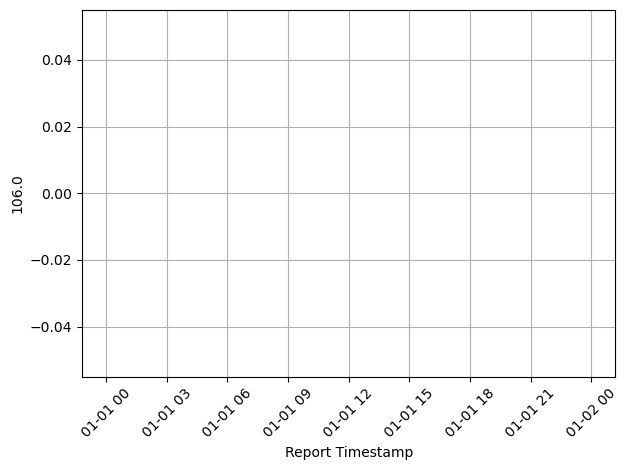

3469 entries for 107.0


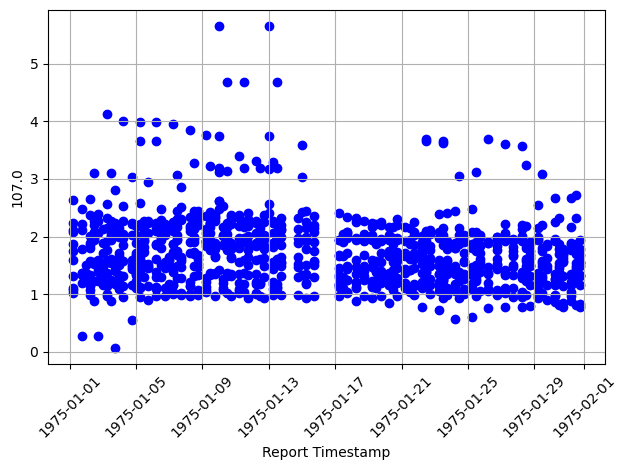

3717 entries for 117.0


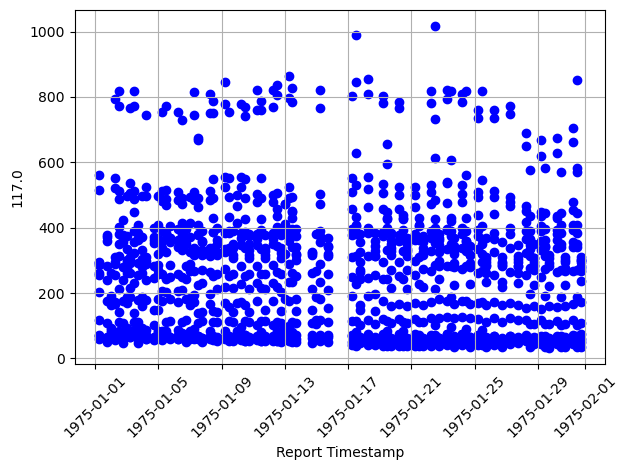

3627 entries for 126.0


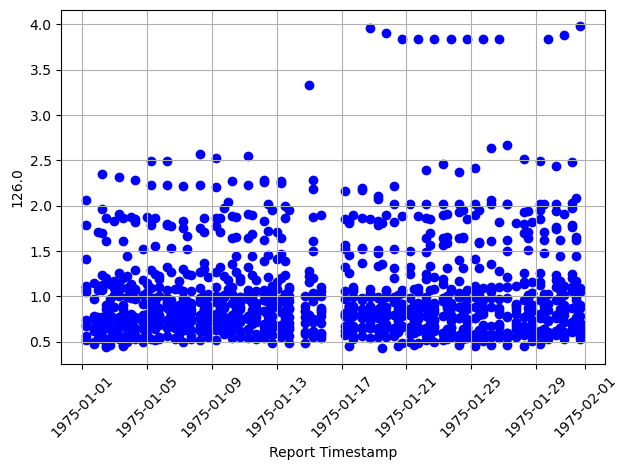

3089 entries for 137.0


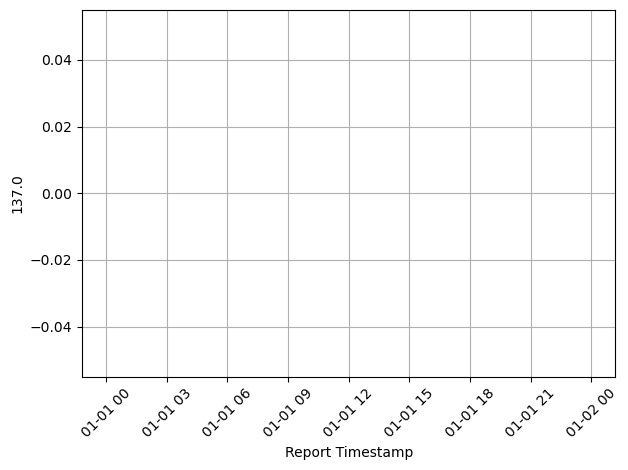

3089 entries for 138.0


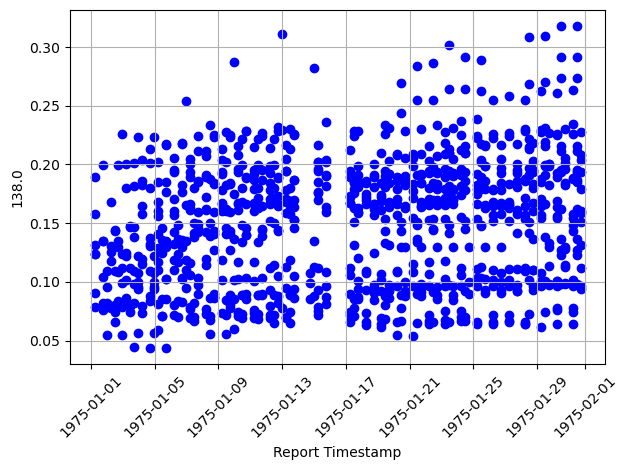

3469 entries for 139.0


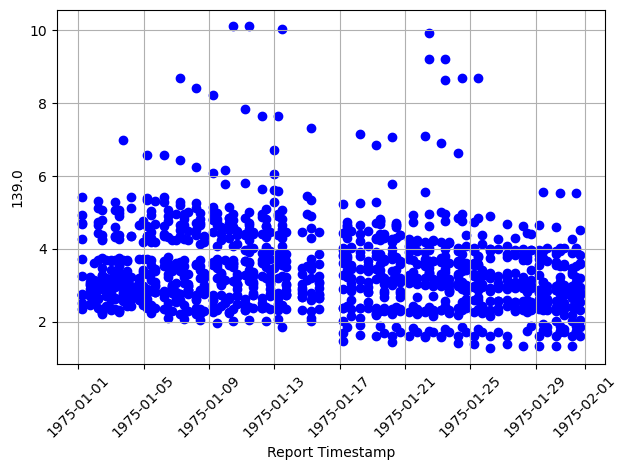

3469 entries for 140.0


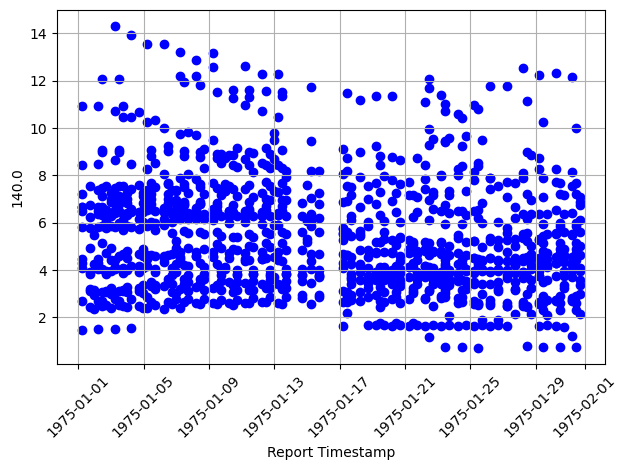

3089 entries for 34.0


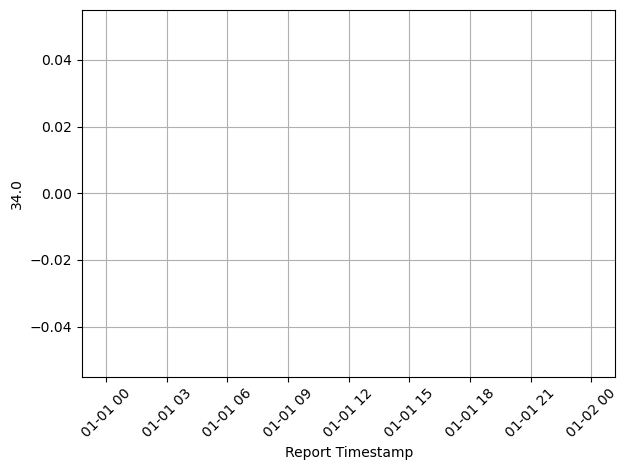

3055 entries for 39.0


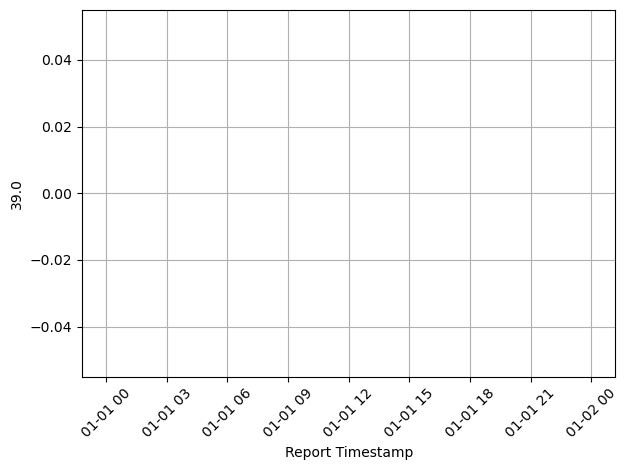

In [64]:
file = "/mnt/users/scratch/uvoggenberger/insitu-comprehensive-upper-air-observation-network_1.0.0_CUON_197501_0.0_0.0.nc"
ds = xr.open_dataset(file)
df_test_file = ds.to_dataframe().reset_index()

for i in df_test_file['observed_variable'].unique():
    df_sel = df_test_file[df_test_file['observed_variable'] == i]
    print(f"{len(df_sel)} entries for {i}")
    plt.scatter(df_sel['report_timestamp'], df_sel['uncertainty_value1'], color='blue', label='Uncertainty Value 1')
    plt.xlabel('Report Timestamp')
    plt.ylabel(i)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid()
    plt.show()
    plt.close()

## 1975.01. Testfile downloaded later on:

6692 entries for b'wind_from_direction'


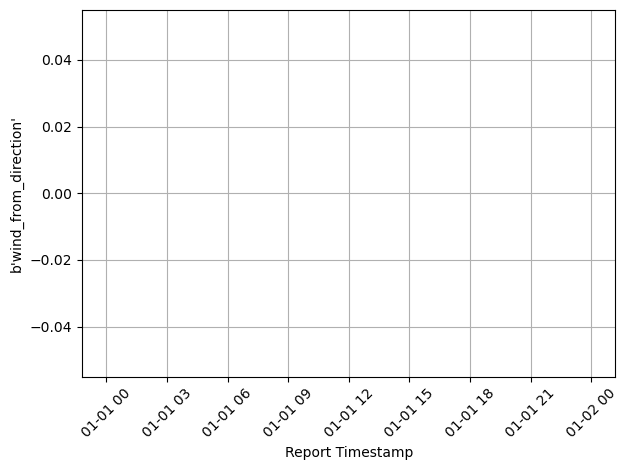

6691 entries for b'wind_speed'


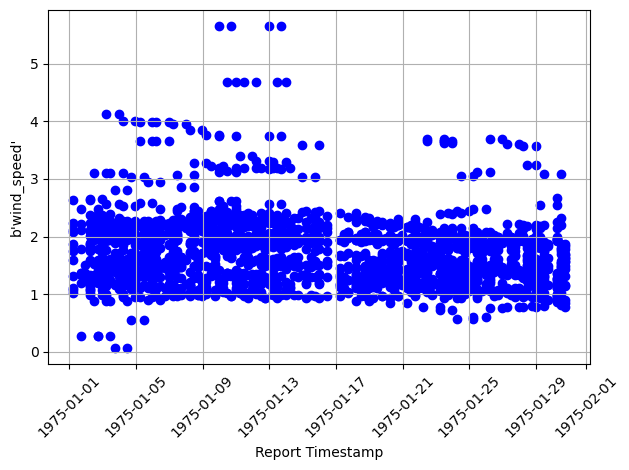

7178 entries for b'geopotential_height'


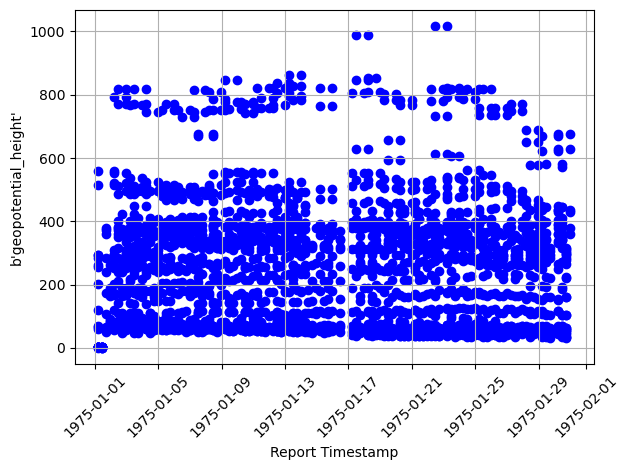

6998 entries for b'air_temperature'


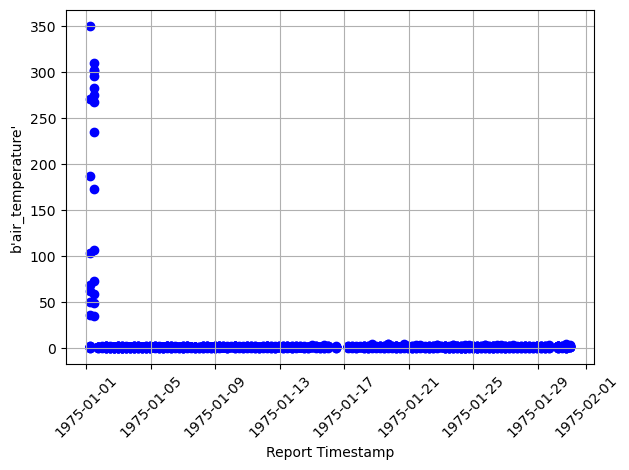

5968 entries for b'air_dewpoint'


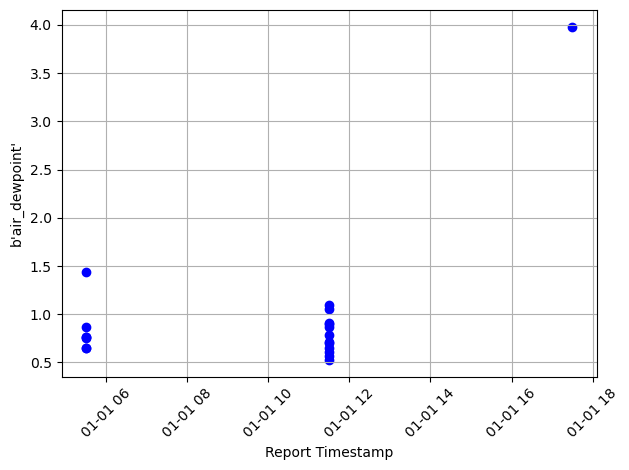

5968 entries for b'relative_humidity'


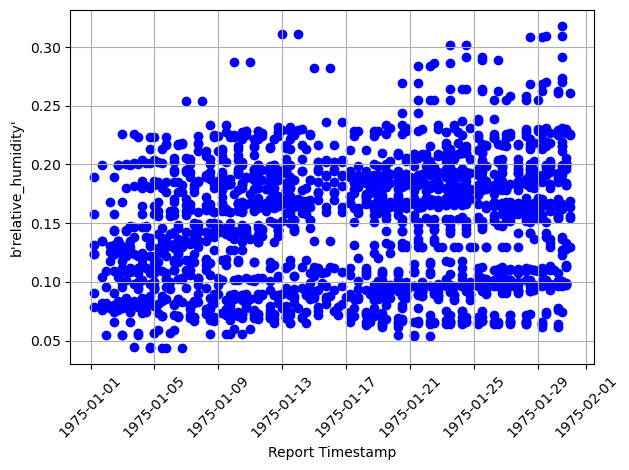

6692 entries for b'eastward_wind_speed'


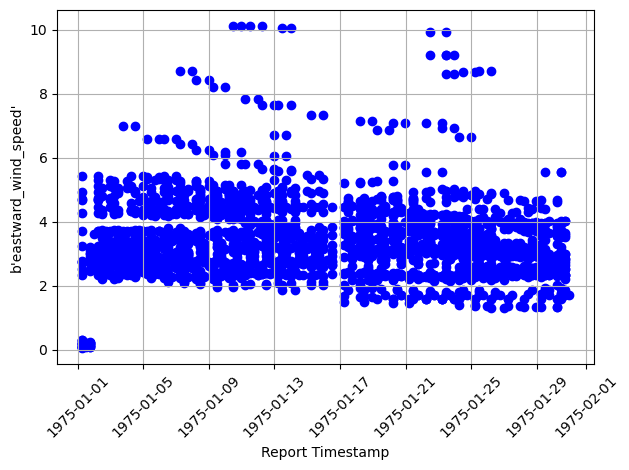

5968 entries for b'dew_point_depression'


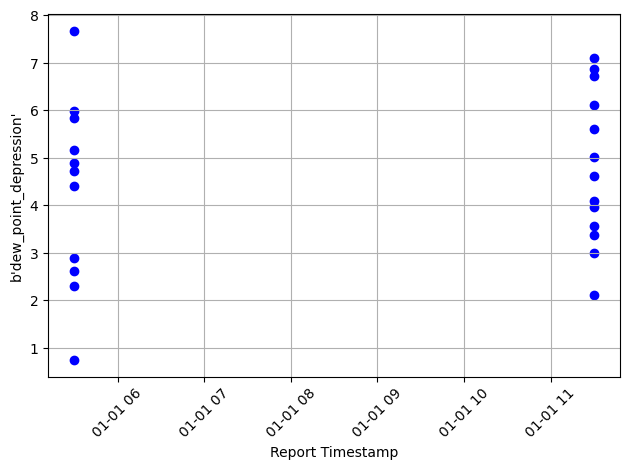

5900 entries for b'specific_humidity'


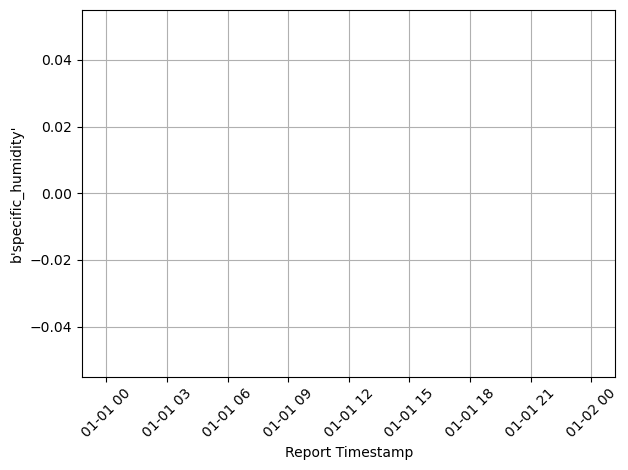

In [ ]:
df_test_file.primary_id
file = "/mnt/users/scratch/uvoggenberger/testfiles/1975_test.nc"
ds = xr.open_dataset(file)
df_test_file = ds.to_dataframe().reset_index()

df_test_file = df_test_file[df_test_file['primary_station_id'] == b'0-20000-0-35229']

for i in df_test_file['observed_variable'].unique():
    df_sel = df_test_file[df_test_file['observed_variable'] == i]
    print(f"{len(df_sel)} entries for {i}")
    plt.scatter(df_sel['report_timestamp'], df_sel['uncertainty_value1'], color='blue', label='Uncertainty Value 1')
    plt.xlabel('Report Timestamp')
    plt.ylabel(i)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid()
    plt.show()
    plt.close()

## Big uncertainties not in original CUON:

In [46]:
test_df = df[df['observed_variable'] == b'eastward_wind_speed']
test_df[test_df['uncertainty_value1'] > 300].primary_station_id.unique()

array([b'0-20000-0-60620', b'0-20000-0-60461', b'0-20000-0-65536',
       b'0-20000-0-60735', b'0-20000-0-60566', b'0-20000-0-60419',
       b'0-20000-0-40430', b'0-20000-0-60402', b'0-20000-0-60720',
       b'0-20000-0-94926'], dtype=object)

In [47]:
file = glob.glob('/mnt/users/scratch/leo/scratch/converted_v29/long/*60620*.nc')[0]


In [34]:
import h5py

In [48]:
with h5py.File(file, 'r') as f:
    print(f['advanced_uncertainty'].keys())
    desr = f['advanced_uncertainty']['desroziers_30'][:]
    var = f['observations_table']['observed_variable'][:]

<KeysViewHDF5 ['desroziers_30', 'index']>


In [52]:
np.nanmax(desr[var == 139])

np.float32(37.782635)